# LAB ASSIGNMENT 01

##### NAME: IMAAD IMRAN HAJWANE
##### YEAR: 4th, Sem 01
##### TOPIC: IMPLEMENTATION OF VARIOUS ML ALGORITHMS


###### IMPORT LIBRARIES

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns

from prettytable import PrettyTable
import missingno as msno
import matplotlib.pyplot as plt

df = pd.read_csv("C:\\Users\\iamim\\OneDrive\\Desktop\\Seventh_Semester\\ML_LAB\\L1\\Most Streamed Spotify Songs 2024.csv", encoding='latin1')


###### COLOR PALLET INITIALIZATION

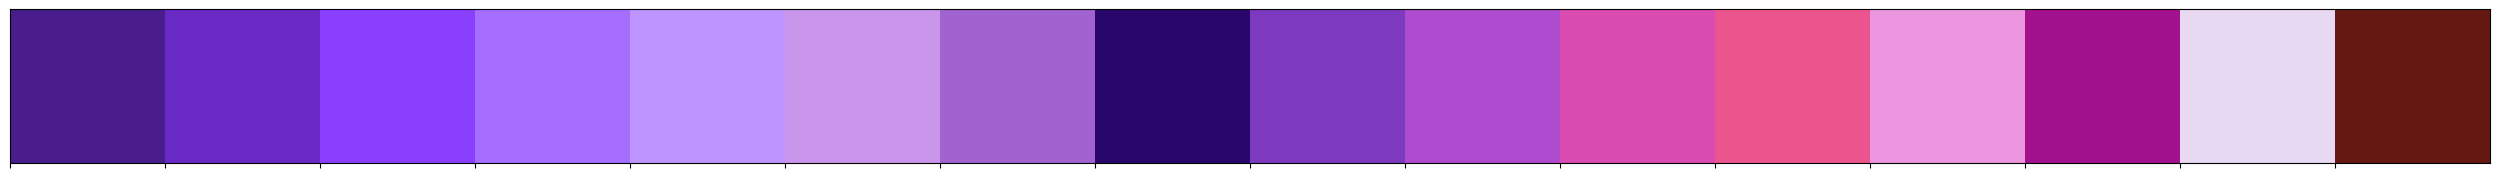

In [2]:
purple = ['#491D8B', '#6929C4', '#8A3FFC', '#A56EFF',
          '#BE95FF', '#CA96EC', '#A163CF', '#29066B',
          '#7D3AC1', '#AF4BCE', '#DB4CB2', '#EB548C',
          '#EC96E0', '#A2128E', '#E8D9F3', '#641811']

sns.palplot(purple, size = 2)


In [3]:
df = df.copy()
df.head(n=10).style.background_gradient(cmap="Purples_r")


c:\Users\iamim\anaconda3\Lib\site-packages\pandas\io\formats\style.py:3618: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
c:\Users\iamim\anaconda3\Lib\site-packages\pandas\io\formats\style.py:3619: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Track                       4600 non-null   object 
 1   Album Name                  4600 non-null   object 
 2   Artist                      4595 non-null   object 
 3   Release Date                4600 non-null   object 
 4   ISRC                        4600 non-null   object 
 5   All Time Rank               4600 non-null   object 
 6   Track Score                 4600 non-null   float64
 7   Spotify Streams             4487 non-null   object 
 8   Spotify Playlist Count      4530 non-null   object 
 9   Spotify Playlist Reach      4528 non-null   object 
 10  Spotify Popularity          3796 non-null   float64
 11  YouTube Views               4292 non-null   object 
 12  YouTube Likes               4285 non-null   object 
 13  TikTok Posts                3427 

###### DESCRIPTION OF THE DATASET

In [5]:
df.describe().T.style.background_gradient(cmap = "magma")


In [6]:
df.head()


Track                    Album Name          Artist  \
0         MILLION DOLLAR BABY  Million Dollar Baby - Single   Tommy Richman   
1                 Not Like Us                   Not Like Us  Kendrick Lamar   
2  i like the way you kiss me    I like the way you kiss me         Artemas   
3                     Flowers              Flowers - Single     Miley Cyrus   
4                     Houdini                       Houdini          Eminem   

  Release Date          ISRC All Time Rank  Track Score Spotify Streams  \
0    4/26/2024  QM24S2402528             1        725.4    39,04,70,936   
1   05-04-2024  USUG12400910             2        545.9    32,37,03,884   
2    3/19/2024  QZJ842400387             3        538.4    60,13,09,283   
3   01-12-2023  USSM12209777             4        444.9  2,03,12,80,633   
4    5/31/2024  USUG12403398             5        423.3    10,70,34,922   

  Spotify Playlist Count Spotify Playlist Reach  ...  SiriusXM Spins  \
0                 30,716           19,66,31,588  ...             684   
1                 28,113           17,45,97,137  ...               3   
2                 54,331           21,16,07,669  ...             536   
3               2,69,802           13,65,69,078  ...           2,182   
4                  7,223           15,14,69,874  ...               1   

  Deezer Playlist Count Deezer Playlist Reach Amazon Playlist Count  \
0                  62.0           1,75,98,718                 114.0   
1                  67.0           1,04,22,430                 111.0   
2                 136.0           3,63,21,847                 172.0   
3                 264.0           2,46,84,248                 210.0   
4                  82.0           1,76,60,624                 105.0   

  Pandora Streams Pandora Track Stations Soundcloud Streams  Shazam Counts  \
0     1,80,04,655                 22,931          48,18,457      26,69,262   
1       77,80,028                 28,444          66,23,075      11,18,279   
2       50,22,621                  5,639          72,08,651      52,85,340   
3    19,02,60,277               2,03,384                NaN    1,18,22,942   
4       44,93,884                  7,006           2,07,179       4,57,017   

  TIDAL Popularity Explicit Track  
0              NaN              0  
1              NaN              1  
2              NaN              0  
3              NaN              0  
4              NaN              1  

[5 rows x 29 columns]

###### MISSING VALULE IDENTIFICATION AND CORRECTION

In [7]:
print("Totally there are {} null values in the dataset".format(df.isnull().sum().sum()))


Totally there are 22800 null values in the dataset


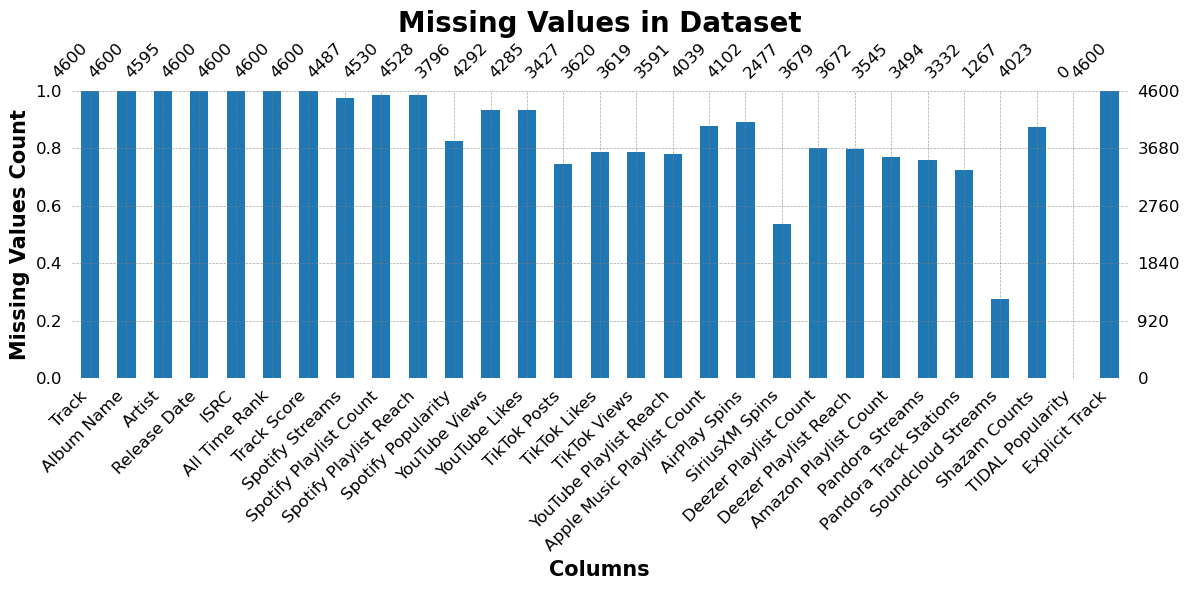

In [8]:
# Create a missing values bar plot with customized colors
fig, ax = plt.subplots(figsize=(12, 6))

# Customize the bar plot
msno.bar(df, ax=ax, color="#1f77b4", fontsize=12, figsize=(12, 6))

# Customize the title and labels
ax.set_title('Missing Values in Dataset', fontsize=20, weight='bold')
ax.set_xlabel('Columns', fontsize=15, weight='bold')
ax.set_ylabel('Missing Values Count', fontsize=15, weight='bold')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=12)

# Customize the y-axis labels
plt.yticks(fontsize=12)

# Adding a grid for better readability
ax.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

# Customize the spines for a cleaner look
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Display the plot
plt.tight_layout()
plt.show()


In [9]:
table = PrettyTable()
table.field_names = ['Feature', 'Data Type']

for column in df.columns:
    column_dtype = str(df[column].dtype)
    table.add_row([column, column_dtype])

print(table)


+----------------------------+-----------+
|          Feature           | Data Type |
+----------------------------+-----------+
|           Track            |   object  |
|         Album Name         |   object  |
|           Artist           |   object  |
|        Release Date        |   object  |
|            ISRC            |   object  |
|       All Time Rank        |   object  |
|        Track Score         |  float64  |
|      Spotify Streams       |   object  |
|   Spotify Playlist Count   |   object  |
|   Spotify Playlist Reach   |   object  |
|     Spotify Popularity     |  float64  |
|       YouTube Views        |   object  |
|       YouTube Likes        |   object  |
|        TikTok Posts        |   object  |
|        TikTok Likes        |   object  |
|        TikTok Views        |   object  |
|   YouTube Playlist Reach   |   object  |
| Apple Music Playlist Count |  float64  |
|       AirPlay Spins        |   object  |
|       SiriusXM Spins       |   object  |
|   Deezer 

###### Feature Engineering

In [10]:

def feature_engineering(df):
    # Convert 'Release Date' to datetime format using the correct format
    try:
        df['Release Date'] = pd.to_datetime(df['Release Date'], format='%d-%m-%Y', errors='coerce')
    except ValueError:
        raise ValueError("Date conversion failed. Please check the date format.")

    # Check if 'Release Date' is now datetime
    if not pd.api.types.is_datetime64_any_dtype(df['Release Date']):
        raise ValueError("Conversion to datetime failed. 'Release Date' is not in datetime format.")

    # Create a new column 'Year' by extracting the year from 'Release Date'
    df['Year'] = df['Release Date'].dt.year

    # Drop the 'TIDAL Popularity' column
    df = df.drop(columns=["TIDAL Popularity"], errors='ignore')

    return df

# Assuming you have already loaded your dataset into the 'df' variable
df = feature_engineering(df)
print(df.describe())


                        Release Date  Track Score  Spotify Popularity  \
count                           1976  4600.000000         3796.000000   
mean   2020-09-03 22:42:01.457489664    41.844043           63.501581   
min              1994-01-01 00:00:00    19.400000            1.000000   
25%              2019-01-06 06:00:00    23.300000           61.000000   
50%              2022-04-02 00:00:00    29.900000           67.000000   
75%              2023-08-02 00:00:00    44.425000           73.000000   
max              2024-12-06 00:00:00   725.400000           96.000000   
std                              NaN    38.543766           16.186438   

       Apple Music Playlist Count  Deezer Playlist Count  \
count                  4039.00000            3679.000000   
mean                     54.60312              32.310954   
min                       1.00000               1.000000   
25%                      10.00000               5.000000   
50%                      28.00000         

###### PLOTTING OF VARIOUS PARAMETERS / FINIDING RELATIONSHIP BETWEEN VARIOUS VARIABLES

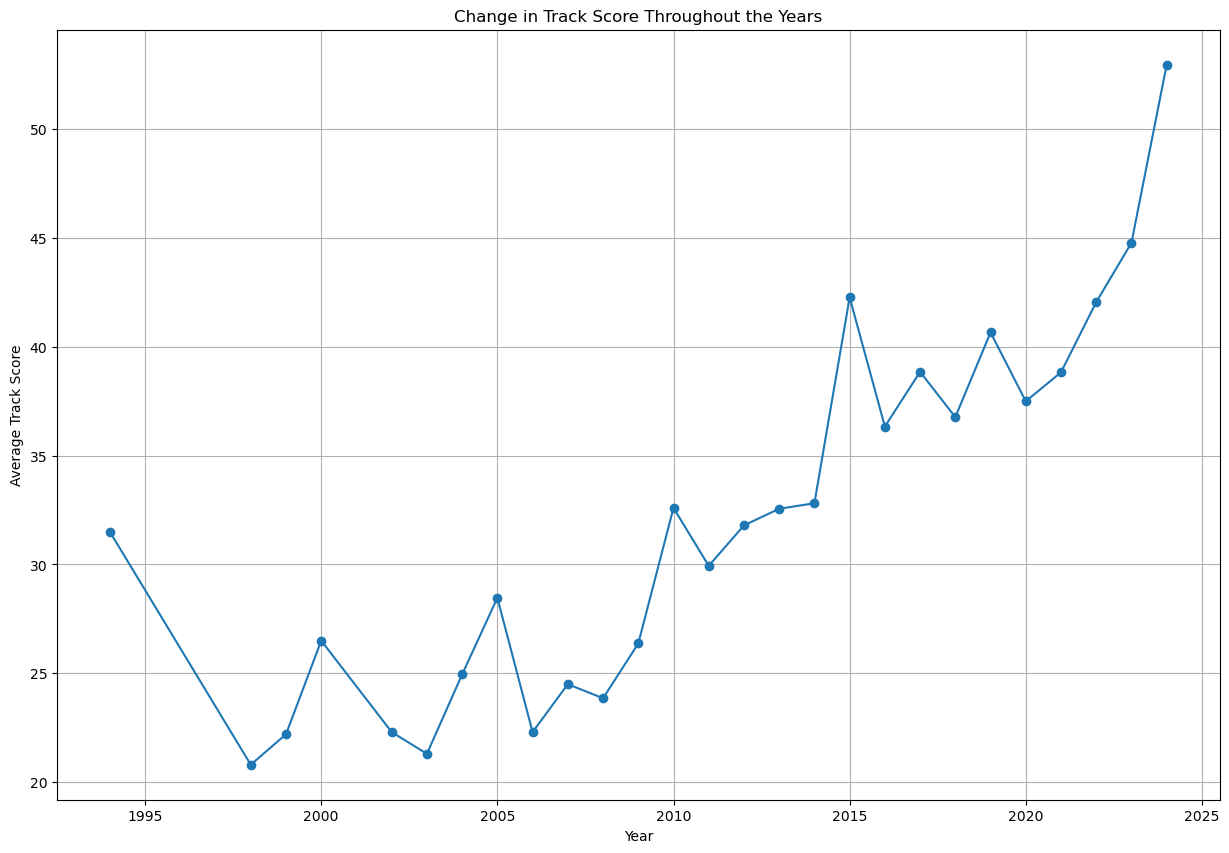

In [11]:
# Group by 'Year' and calculate the average 'Track Score' for each year
avg_track_score_per_year = df.groupby('Year')['Track Score'].mean()

plt.figure(figsize=(15, 10))
avg_track_score_per_year.plot(kind='line', marker='o')
plt.title('Change in Track Score Throughout the Years')
plt.xlabel('Year')
plt.ylabel('Average Track Score')
plt.grid(True)
plt.show()


###### The best Track Score for each year

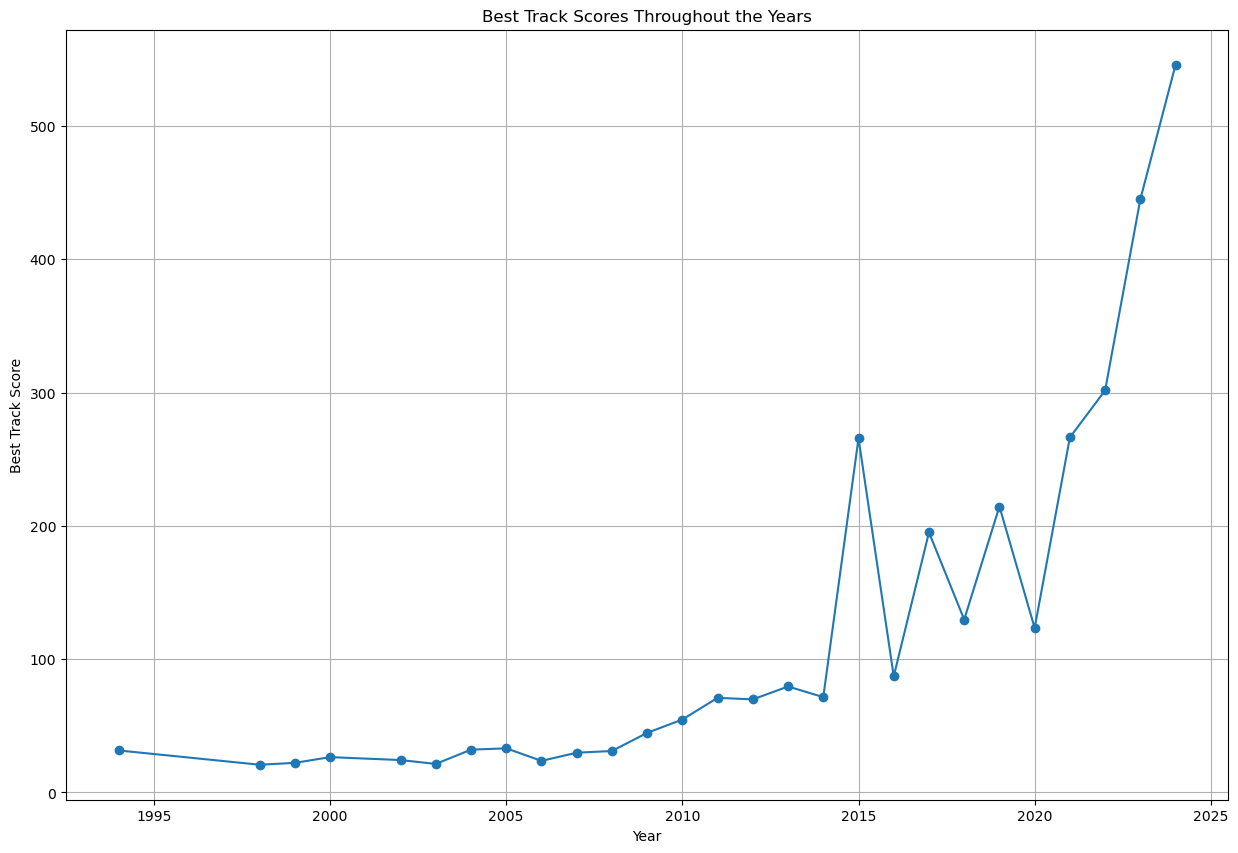

In [12]:
# Group by 'Year' and get the best 'Track Score' for each year
best_track_score_per_year = df.groupby('Year')['Track Score'].max()

plt.figure(figsize=(15, 10))
best_track_score_per_year.plot(kind='line', marker='o')
plt.title('Best Track Scores Throughout the Years')
plt.xlabel('Year')
plt.ylabel('Best Track Score')
plt.grid(True)
plt.show()


###### The worst Track Score for each year

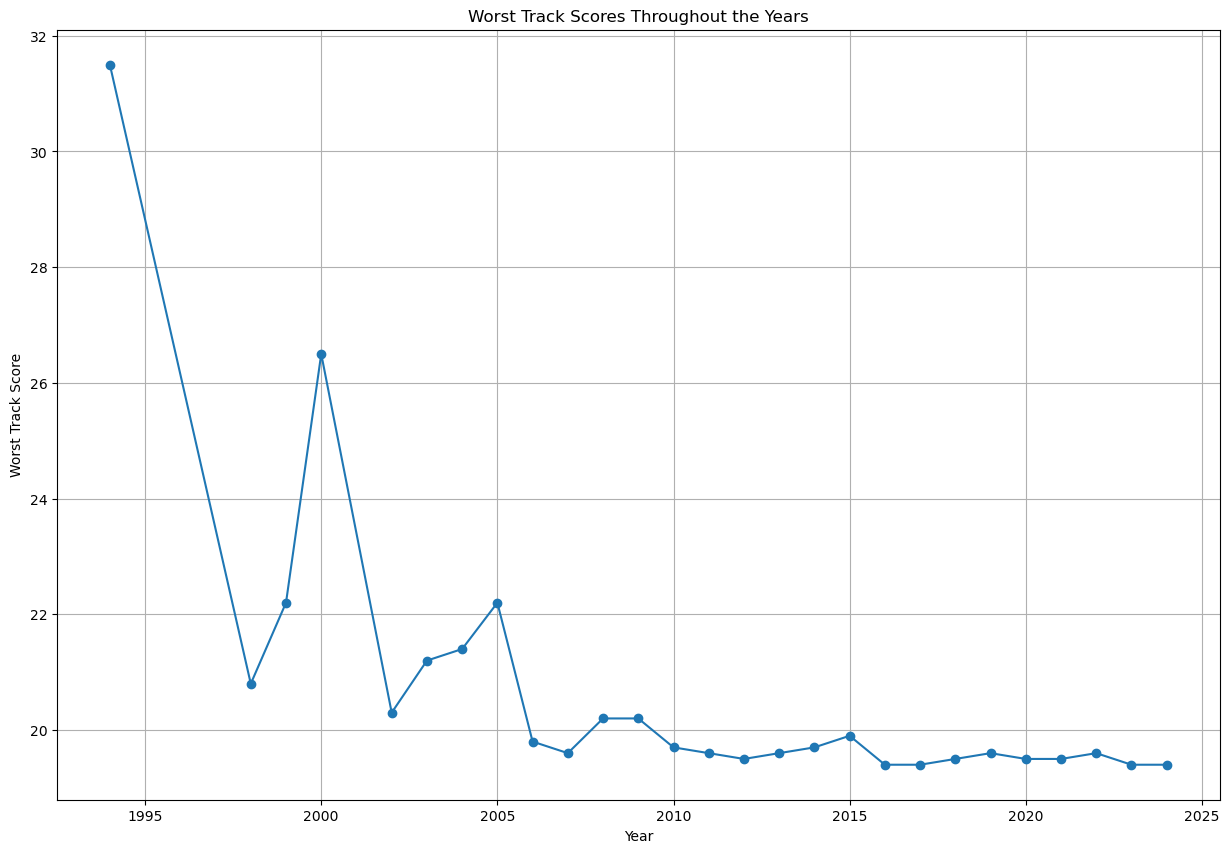

In [13]:
# Group by 'Year' and get the worst 'Track Score' for each year
worst_track_score_per_year = df.groupby('Year')['Track Score'].min()

plt.figure(figsize=(15, 10))
worst_track_score_per_year.plot(kind='line', marker='o')
plt.title('Worst Track Scores Throughout the Years')
plt.xlabel('Year')
plt.ylabel('Worst Track Score')
plt.grid(True)
plt.show()


###### Number of Tracks every Year

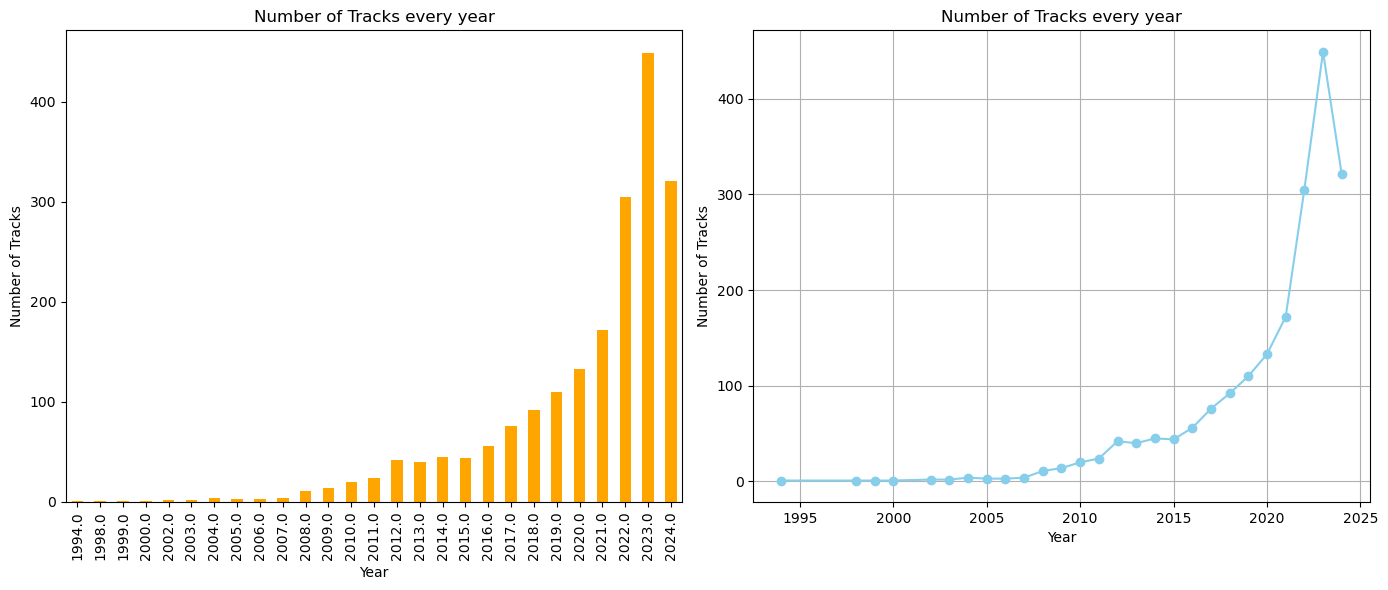

In [14]:
# Group by 'Year' and get the number of Tracks for each year
tracks_per_year = df.groupby('Year')['Track'].count()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Bar Chart
tracks_per_year.plot(kind='bar', ax=axes[0], color='orange')
axes[0].set_title('Number of Tracks every year')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Number of Tracks')

# Line Chart
tracks_per_year.plot(kind='line', ax=axes[1], color='skyblue', marker='o')
axes[1].set_title('Number of Tracks every year')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Number of Tracks')
axes[1].grid(True)

plt.tight_layout()
plt.show()


###### Interest in Explicit Music

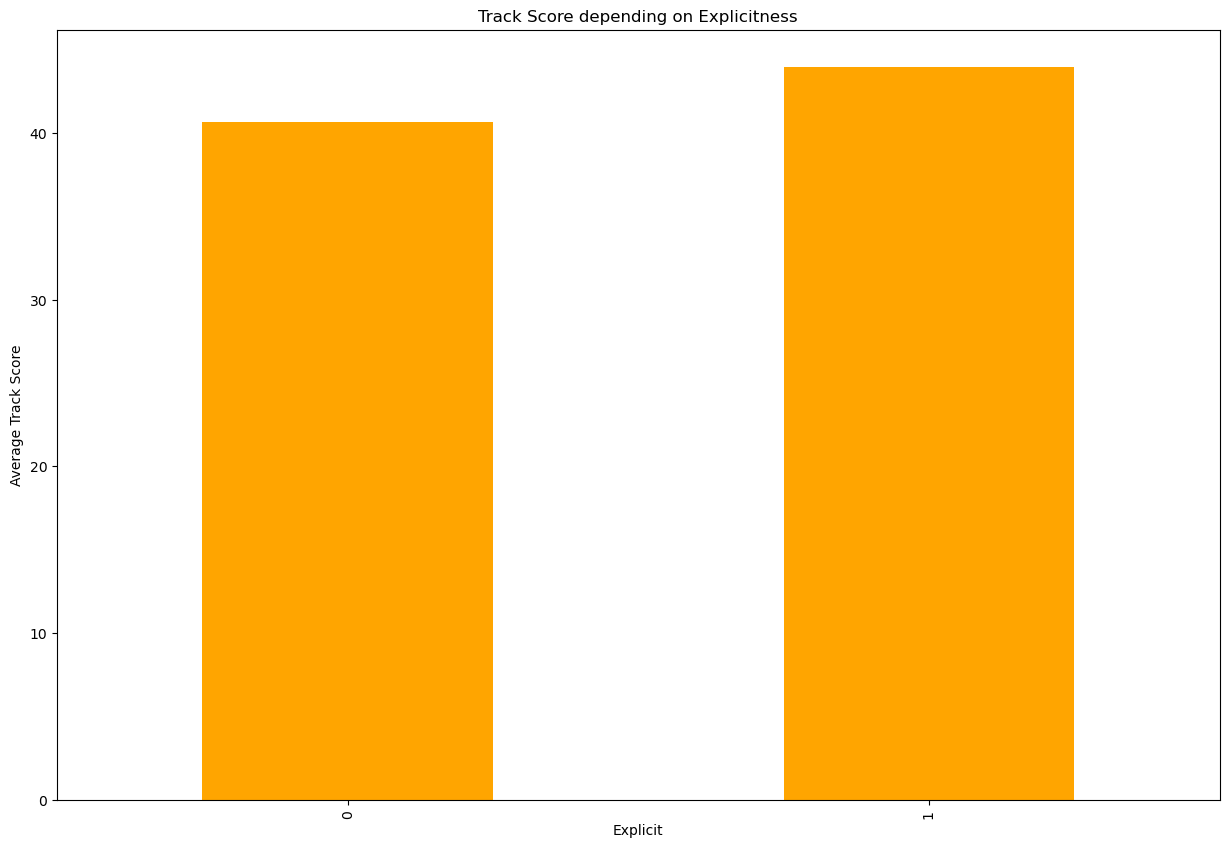

In [15]:
# Calculate the average 'Track Score' based on Explicitness
explicit_track_scores = df.groupby('Explicit Track')['Track Score'].mean()

plt.figure(figsize=(15, 10))
explicit_track_scores.plot(kind='bar', color='orange')
plt.title('Track Score depending on Explicitness')
plt.xlabel('Explicit')
plt.ylabel('Average Track Score')
plt.show()


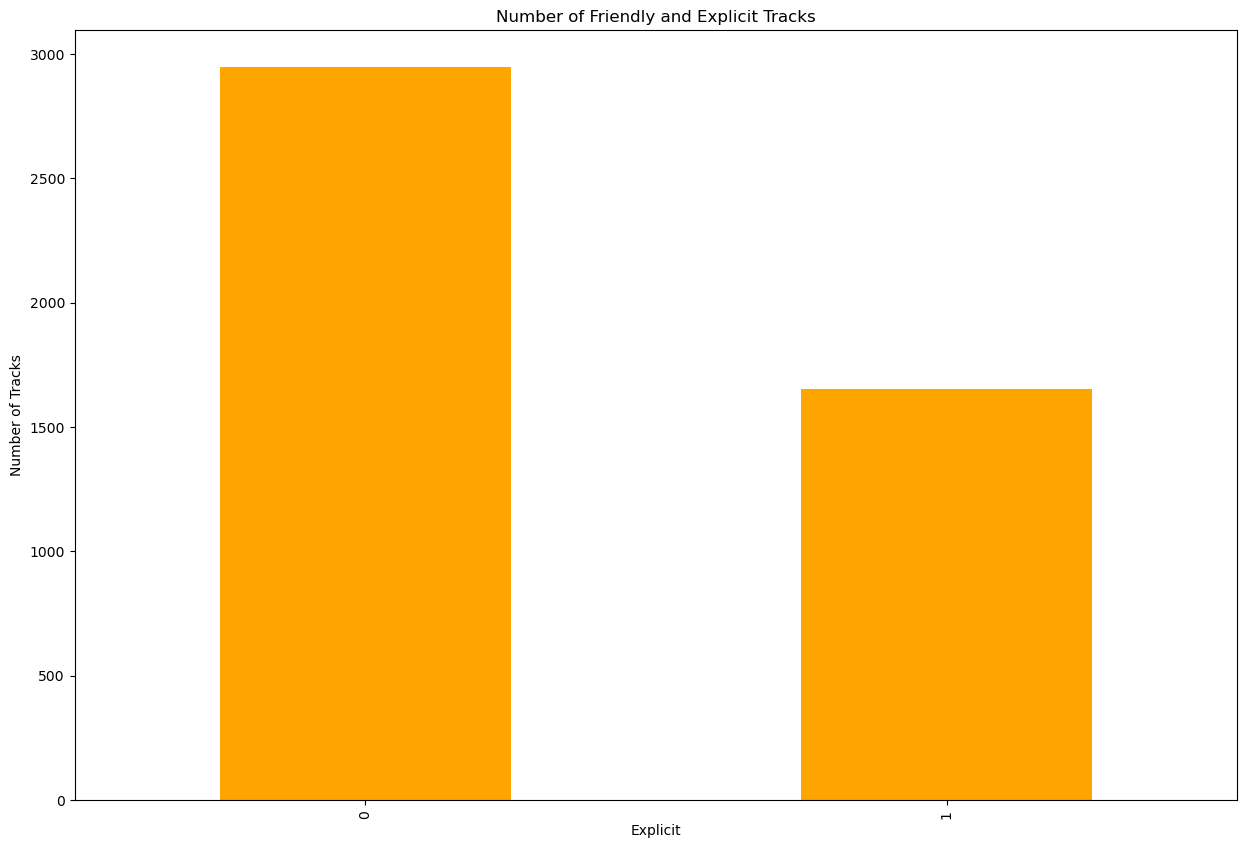

In [16]:
# Count the number of Explicit Tracks
explicit_track_scores = df.groupby('Explicit Track')['Track'].count()

plt.figure(figsize=(15, 10))
explicit_track_scores.plot(kind='bar', color='orange')
plt.title('Number of Friendly and Explicit Tracks')
plt.xlabel('Explicit')
plt.ylabel('Number of Tracks')
plt.show()


###### Change in Explicitness throughout the Years

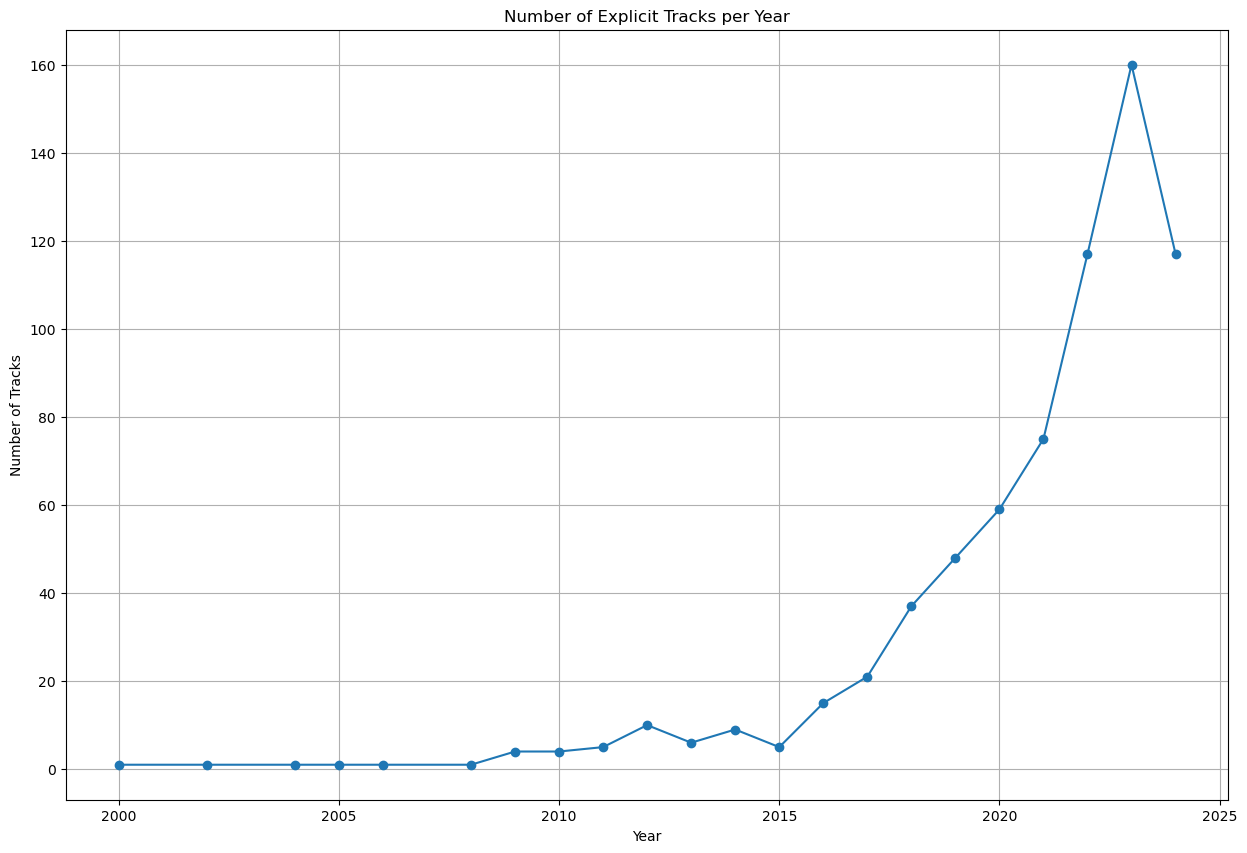

In [17]:
# Group by 'Year' and calculate the number of Explicit Tracks for each year
explicit_tracks = df[df['Explicit Track'] == 1]
explicit_tracks_per_year = explicit_tracks.groupby('Year')['Track'].count()

plt.figure(figsize=(15, 10))
explicit_tracks_per_year.plot(kind='line', marker='o')
plt.title('Number of Explicit Tracks per Year')
plt.xlabel('Year')
plt.ylabel('Number of Tracks')
plt.grid(True)
plt.show()


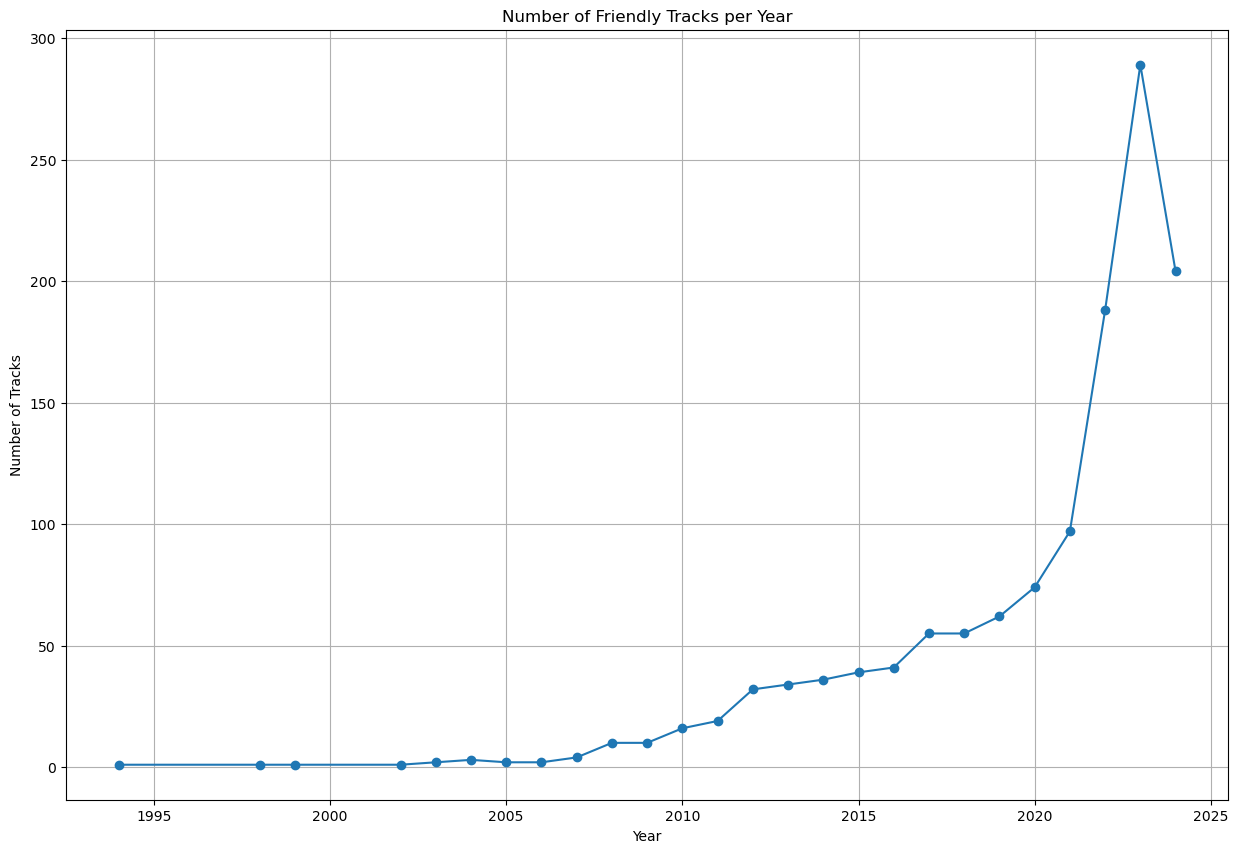

In [18]:
# Group by 'Year' and calculate the number of Explicit Tracks for each year
friendly_tracks = df[df['Explicit Track'] == 0]
friendly_tracks_per_year = friendly_tracks.groupby('Year')['Track'].count()

plt.figure(figsize=(15, 10))
friendly_tracks_per_year.plot(kind='line', marker='o')
plt.title('Number of Friendly Tracks per Year')
plt.xlabel('Year')
plt.ylabel('Number of Tracks')
plt.grid(True)
plt.show()


###### RELATIONSHIP BETWEEN SPOTIFY STREAMS VS POPULARITY

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a scatter plot with hue based on 'Artist'
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x="Spotify Streams",
    y="Spotify Popularity",
    hue="Artist",
    data=df,
    palette="viridis",   # You can choose a color palette that fits your style
    alpha=0.7,          # Slight transparency to better visualize overlapping points
    s=100                # Size of the points
).set(
    title="Relationship between Spotify Streams and Popularity",
    xlabel="Spotify Streams",
    ylabel="Spotify Popularity"
)

# Improve the appearance
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Move the legend outside the plot
plt.grid(True, linestyle='--', alpha=0.7)  # Add a grid for better readability
plt.tight_layout()  # Adjust layout to fit labels and title

# Display the plot
plt.show()


C:\Users\iamim\AppData\Local\Temp\ipykernel_21532\4184373051.py:23: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()  # Adjust layout to fit labels and title


###### Regression Plots for Selected Metrics / VARIOUS VARIABLES

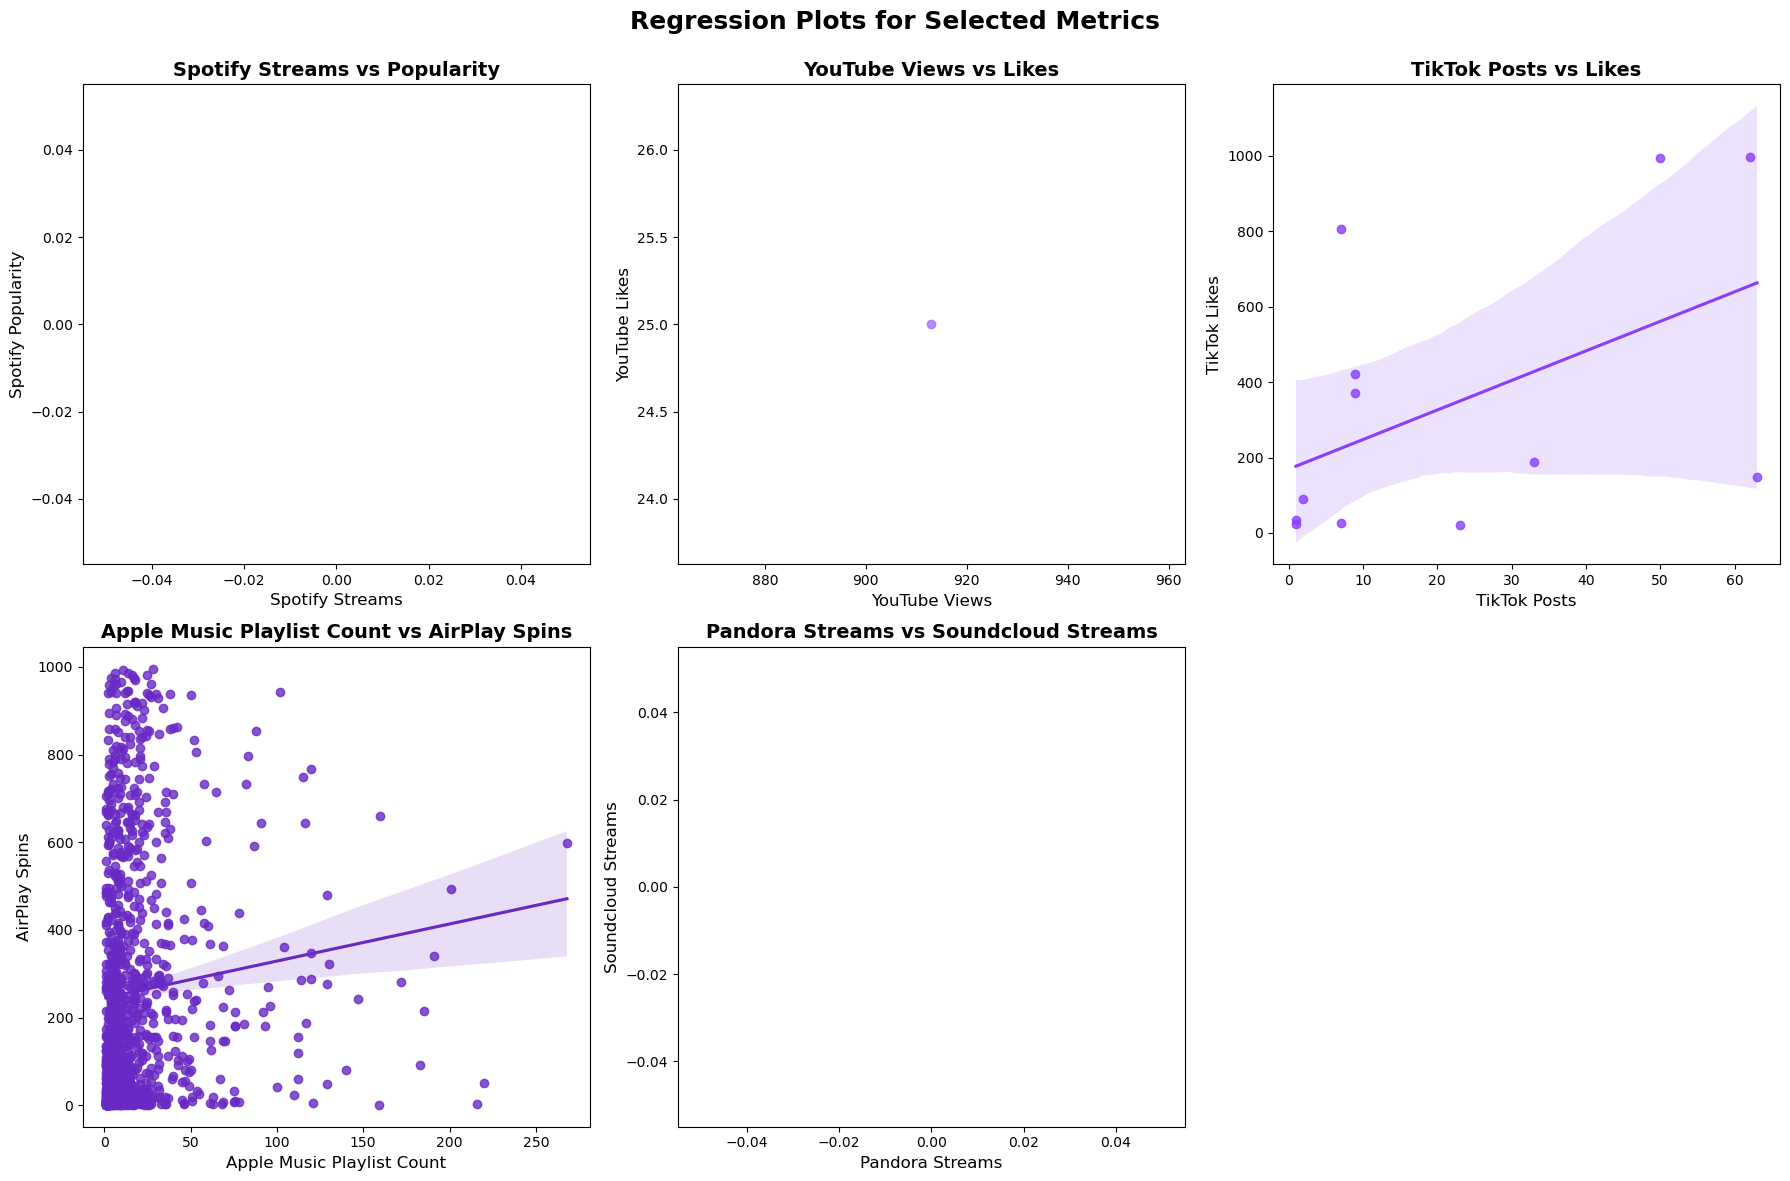

In [20]:

# Load the dataset with a different encoding
file_path = r'C:\Users\iamim\OneDrive\Desktop\Seventh_Semester\ML_LAB\L1\Most Streamed Spotify Songs 2024.csv'
df = pd.read_csv(file_path, encoding='ISO-8859-1')  # Try a different encoding

# Convert columns to numeric, if not already (ignore errors for non-numeric columns)
numeric_columns = [
    'Spotify Streams', 'Spotify Popularity', 'YouTube Views', 'YouTube Likes',
    'TikTok Posts', 'TikTok Likes', 'Apple Music Playlist Count', 'AirPlay Spins',
    'Pandora Streams', 'Soundcloud Streams'
]
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Create a 2x3 grid for subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

# Define the color palette for consistency
colors = ["#A2128E", "#A56EFF", "#8A3FFC", "#6929C4", "#491D8B"]

# Plot each regression plot
sns.regplot(ax=axes[0], x="Spotify Streams", y="Spotify Popularity", data=df, color=colors[0])
axes[0].set_title('Spotify Streams vs Popularity', fontsize=14, weight='bold')
axes[0].set_xlabel('Spotify Streams', fontsize=12)
axes[0].set_ylabel('Spotify Popularity', fontsize=12)

sns.regplot(ax=axes[1], x="YouTube Views", y="YouTube Likes", data=df, color=colors[1])
axes[1].set_title('YouTube Views vs Likes', fontsize=14, weight='bold')
axes[1].set_xlabel('YouTube Views', fontsize=12)
axes[1].set_ylabel('YouTube Likes', fontsize=12)

sns.regplot(ax=axes[2], x="TikTok Posts", y="TikTok Likes", data=df, color=colors[2])
axes[2].set_title('TikTok Posts vs Likes', fontsize=14, weight='bold')
axes[2].set_xlabel('TikTok Posts', fontsize=12)
axes[2].set_ylabel('TikTok Likes', fontsize=12)

sns.regplot(ax=axes[3], x="Apple Music Playlist Count", y="AirPlay Spins", data=df, color=colors[3])
axes[3].set_title('Apple Music Playlist Count vs AirPlay Spins', fontsize=14, weight='bold')
axes[3].set_xlabel('Apple Music Playlist Count', fontsize=12)
axes[3].set_ylabel('AirPlay Spins', fontsize=12)

sns.regplot(ax=axes[4], x="Pandora Streams", y="Soundcloud Streams", data=df, color=colors[4])
axes[4].set_title('Pandora Streams vs Soundcloud Streams', fontsize=14, weight='bold')
axes[4].set_xlabel('Pandora Streams', fontsize=12)
axes[4].set_ylabel('Soundcloud Streams', fontsize=12)

# Hide the empty subplot
axes[5].axis('off')

# Improve layout
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.suptitle('Regression Plots for Selected Metrics', size=18, weight='bold')

# Display the plots
plt.show()


### Linear Regression

C:\Users\iamim\AppData\Local\Temp\ipykernel_21532\2174951306.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.dropna(inplace=True)


Mean Absolute Error (MAE): 0.00
Mean Squared Error (MSE): 0.00
R^2 Score: 1.00


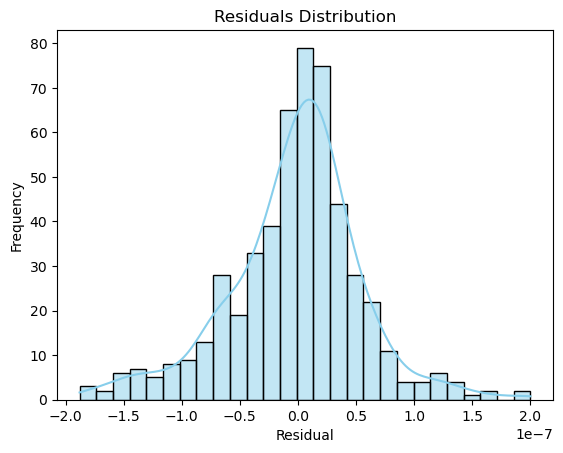

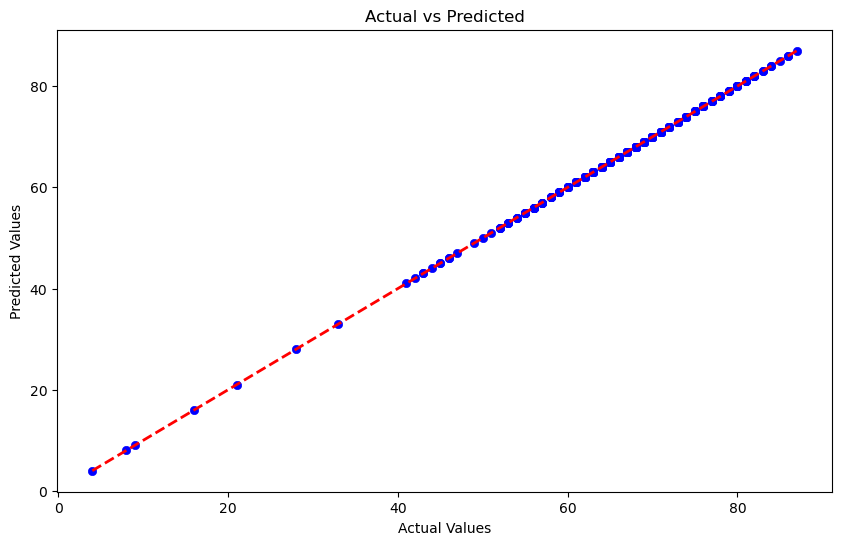

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Load the dataset
file_path = r'C:\Users\iamim\OneDrive\Desktop\Seventh_Semester\ML_LAB\L1\Most Streamed Spotify Songs 2024.csv'
df = pd.read_csv(file_path, encoding='ISO-8859-1')

# Convert columns to numeric by removing commas and converting data types
def clean_numeric_column(column):
    df[column] = df[column].astype(str).str.replace(',', '')
    df[column] = pd.to_numeric(df[column], errors='coerce')  # Convert to numeric, coercing errors to NaN

# List of columns to be converted
numeric_columns = [
    'Spotify Streams', 'Spotify Popularity', 'YouTube Views', 'YouTube Likes',
    'TikTok Posts', 'TikTok Likes', 'Apple Music Playlist Count', 'AirPlay Spins',
    'Pandora Streams', 'Soundcloud Streams'
]

# Apply conversion
for col in numeric_columns:
    clean_numeric_column(col)

# Drop rows with missing target values
df.dropna(subset=['Spotify Popularity'], inplace=True)

# Define features and target variable
features = numeric_columns[:-1]  # Exclude 'Spotify Popularity' from features
target = 'Spotify Popularity'

X = df[features]
y = df[target]

# Handle missing values by dropping rows with any NaN values in the features
X.dropna(inplace=True)
y = y[X.index]  # Align y with X

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")

# Plot residuals
residuals = y_test - y_pred
sns.histplot(residuals, kde=True, color="skyblue")
plt.title('Residuals Distribution')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.show()

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, color='blue', edgecolor=None)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()


### Verification

In [22]:
# Display some of the predictions vs actual values
comparison_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})
print(comparison_df.head(10))


      Actual  Predicted
320     73.0       73.0
3663    64.0       64.0
2935    43.0       43.0
4262    60.0       60.0
2815    72.0       72.0
1253    64.0       64.0
1725    69.0       69.0
4487    76.0       76.0
1260    67.0       67.0
2226    68.0       68.0


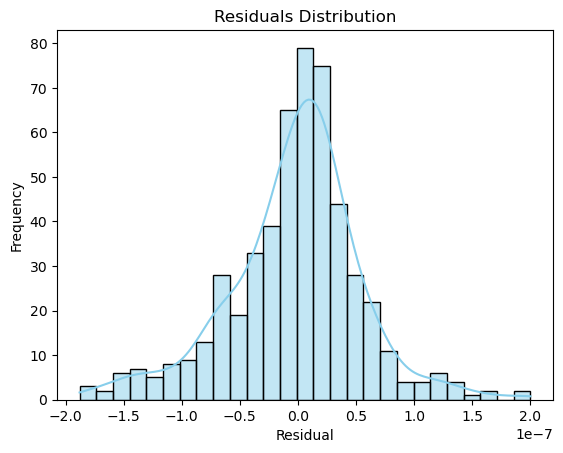

In [23]:
# Plot residuals again
residuals = y_test - y_pred
sns.histplot(residuals, kde=True, color="skyblue")
plt.title('Residuals Distribution')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.show()


In [24]:
from sklearn.model_selection import cross_val_score

# Evaluate model using cross-validation
cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
print(f"Cross-Validated Mean Squared Error: {-cv_scores.mean():.2f}")


Cross-Validated Mean Squared Error: 0.00


In [25]:
print(df.describe())


       Track Score  Spotify Streams  Spotify Popularity  YouTube Views  \
count  3796.000000     3.781000e+03         3796.000000   3.682000e+03   
mean     42.340648     4.933301e+08           63.501581   4.314943e+08   
std      39.305733     5.397917e+08           16.186438   7.164549e+08   
min      19.400000     2.030000e+03            1.000000   1.151200e+04   
25%      23.500000     1.105336e+08           61.000000   5.448777e+07   
50%      30.200000     3.052310e+08           67.000000   1.791933e+08   
75%      44.900000     6.899395e+08           73.000000   5.213143e+08   
max     725.400000     4.281469e+09           96.000000   1.632276e+10   

       YouTube Likes  TikTok Posts  TikTok Likes  Apple Music Playlist Count  \
count   3.678000e+03  3.196000e+03  3.309000e+03                 3541.000000   
mean    3.186659e+06  9.286035e+05  1.178719e+08                   59.815024   
std     4.735693e+06  2.351351e+06  5.694578e+08                   74.541972   
min     7.100

### Quadratic regression

C:\Users\iamim\AppData\Local\Temp\ipykernel_21532\1116684474.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.dropna(inplace=True)


Mean Absolute Error (MAE): 3.22
Mean Squared Error (MSE): 51.60
R^2 Score: 0.44


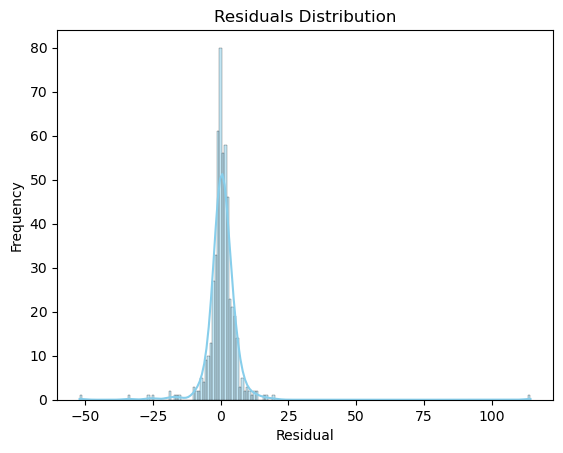

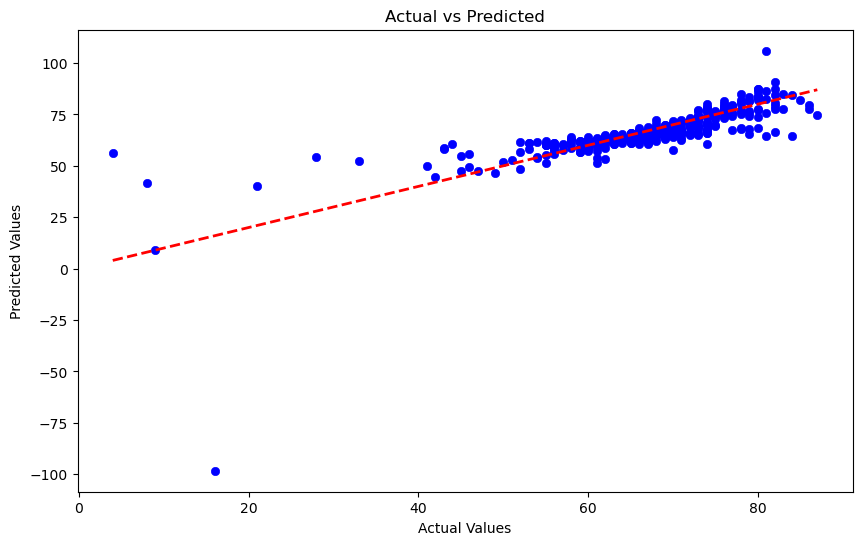

      Actual  Predicted
320     73.0  72.832489
3663    64.0  64.569454
2935    43.0  58.312397
4262    60.0  58.979785
2815    72.0  69.541138
1253    64.0  60.873027
1725    69.0  69.802543
4487    76.0  73.283080
1260    67.0  66.403966
2226    68.0  68.040478
Cross-Validated Mean Squared Error: 977.13


In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Load the dataset
file_path = r'C:\Users\iamim\OneDrive\Desktop\Seventh_Semester\ML_LAB\L1\Most Streamed Spotify Songs 2024.csv'
df = pd.read_csv(file_path, encoding='ISO-8859-1')

# Convert columns to numeric
def clean_numeric_column(column):
    df[column] = df[column].astype(str).str.replace(',', '')
    df[column] = pd.to_numeric(df[column], errors='coerce')

numeric_columns = [
    'Spotify Streams', 'Spotify Popularity', 'YouTube Views', 'YouTube Likes',
    'TikTok Posts', 'TikTok Likes', 'Apple Music Playlist Count', 'AirPlay Spins',
    'Pandora Streams', 'Soundcloud Streams'
]

for col in numeric_columns:
    clean_numeric_column(col)

df.dropna(subset=['Spotify Popularity'], inplace=True)

# Define features and target variable
features = numeric_columns[:-1]
target = 'Spotify Popularity'

X = df[features]
y = df[target]

X.dropna(inplace=True)
y = y[X.index]

# Create polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Initialize and train the quadratic regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")

# Plot residuals
residuals = y_test - y_pred
sns.histplot(residuals, kde=True, color="skyblue")
plt.title('Residuals Distribution')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.show()

# Plot Actual vs Predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, color='blue', edgecolor=None)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

# Check predictions vs actual values
comparison_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})
print(comparison_df.head(10))

# Optional: Cross-validation
from sklearn.model_selection import cross_val_score

# Cross-validated mean squared error
cv_scores = cross_val_score(model, X_poly, y, cv=5, scoring='neg_mean_squared_error')
print(f"Cross-Validated Mean Squared Error: {-cv_scores.mean():.2f}")


### Logistic Regression

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98        91
           1       1.00      1.00      1.00       669

    accuracy                           1.00       760
   macro avg       1.00      0.98      0.99       760
weighted avg       1.00      1.00      1.00       760



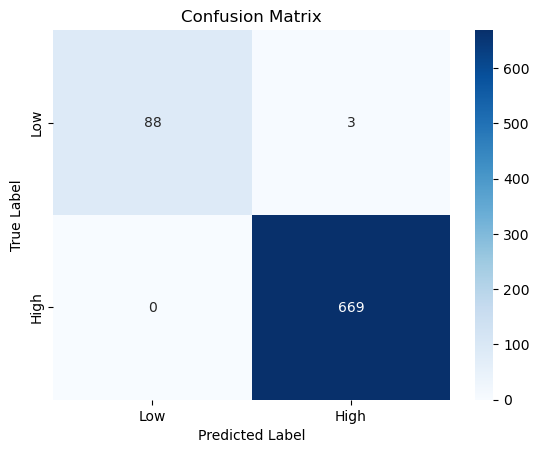

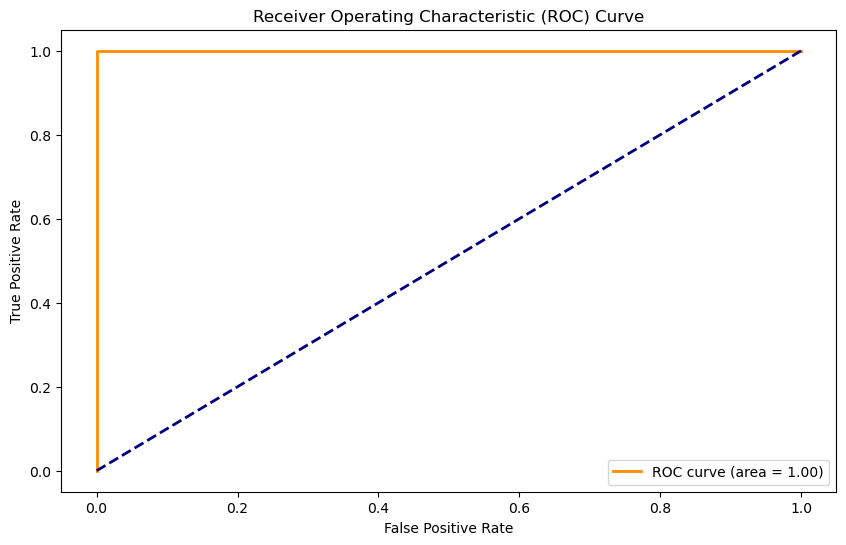

In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler

# Load the dataset
file_path = r'C:\Users\iamim\OneDrive\Desktop\Seventh_Semester\ML_LAB\L1\Most Streamed Spotify Songs 2024.csv'
df = pd.read_csv(file_path, encoding='ISO-8859-1')

# Convert relevant columns to numeric
def clean_numeric_column(column):
    df[column] = df[column].astype(str).str.replace(',', '')
    df[column] = pd.to_numeric(df[column], errors='coerce')

numeric_columns = [
    'Spotify Streams', 'Spotify Popularity', 'YouTube Views', 'YouTube Likes',
    'TikTok Posts', 'TikTok Likes', 'Apple Music Playlist Count', 'AirPlay Spins',
    'Pandora Streams', 'Soundcloud Streams'
]

for col in numeric_columns:
    clean_numeric_column(col)

# Drop rows with missing target values
df.dropna(subset=['Spotify Popularity'], inplace=True)

# Create a binary target variable
df['Popularity Category'] = np.where(df['Spotify Popularity'] > 50, 1, 0)  # 1 for high popularity, 0 for low

# Define features and target variable
features = numeric_columns[:-1]
target = 'Popularity Category'

X = df[features]
y = df[target]

# Handle missing values in features
X = X.fillna(X.mean())

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)
y_prob = model.predict_proba(X_test_scaled)[:, 1]

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Low', 'High'], yticklabels=['Low', 'High'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


### Random Forest

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        91
           1       1.00      1.00      1.00       669

    accuracy                           1.00       760
   macro avg       1.00      1.00      1.00       760
weighted avg       1.00      1.00      1.00       760



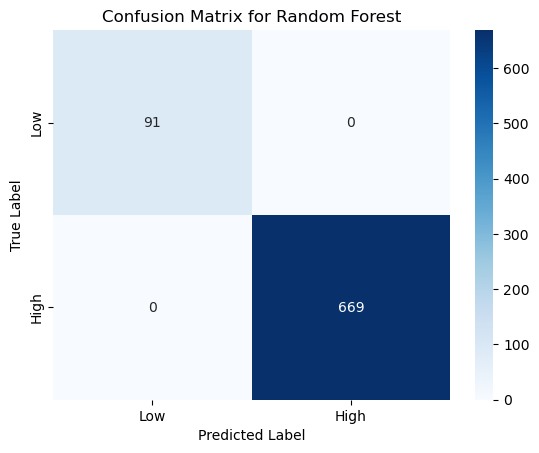

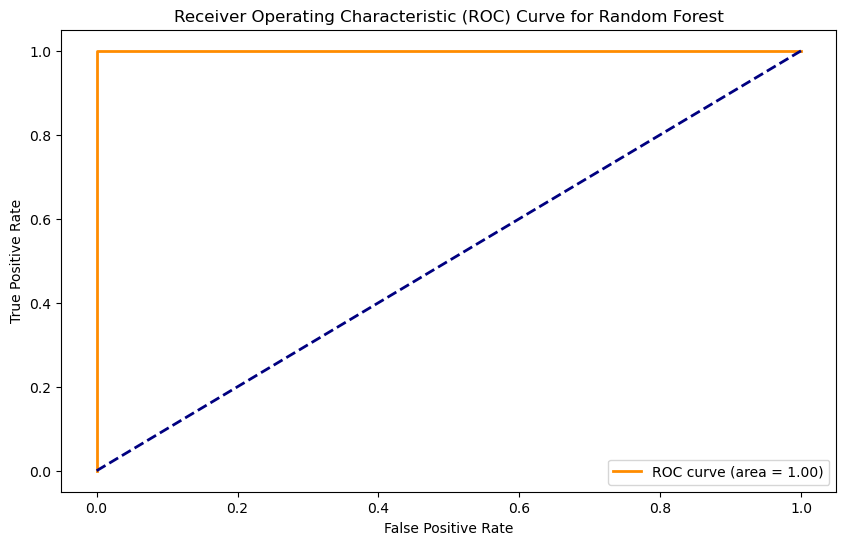

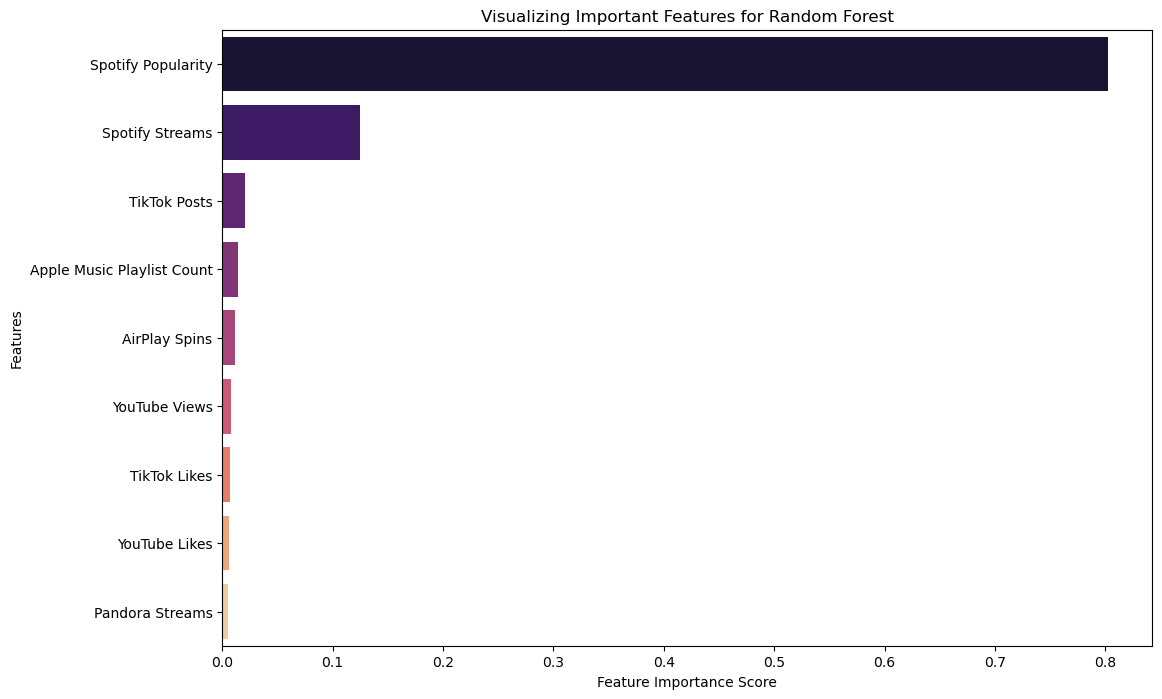

In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler
import warnings

# Suppress warnings
warnings.filterwarnings('ignore')

# Load the dataset
file_path = r'C:\Users\iamim\OneDrive\Desktop\Seventh_Semester\ML_LAB\L1\Most Streamed Spotify Songs 2024.csv'
df = pd.read_csv(file_path, encoding='ISO-8859-1')

# Convert relevant columns to numeric
def clean_numeric_column(column):
    df[column] = df[column].astype(str).str.replace(',', '')
    df[column] = pd.to_numeric(df[column], errors='coerce')

numeric_columns = [
    'Spotify Streams', 'Spotify Popularity', 'YouTube Views', 'YouTube Likes',
    'TikTok Posts', 'TikTok Likes', 'Apple Music Playlist Count', 'AirPlay Spins',
    'Pandora Streams', 'Soundcloud Streams'
]

for col in numeric_columns:
    clean_numeric_column(col)

# Drop rows with missing target values
df.dropna(subset=['Spotify Popularity'], inplace=True)

# Create a binary target variable for classification
df['Popularity Category'] = np.where(df['Spotify Popularity'] > 50, 1, 0)  # 1 for high popularity, 0 for low

# Define features and target variable
features = numeric_columns[:-1]
target = 'Popularity Category'

X = df[features]
y = df[target]

# Handle missing values in features
X = X.fillna(X.mean())

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = rf_model.predict(X_test_scaled)
y_prob = rf_model.predict_proba(X_test_scaled)[:, 1]

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Low', 'High'], yticklabels=['Low', 'High'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Random Forest')
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Random Forest')
plt.legend(loc='lower right')
plt.show()

# Feature Importance
feature_importances = rf_model.feature_importances_
features_sorted = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(12, 8))
sns.barplot(x=feature_importances[features_sorted], y=np.array(features)[features_sorted], palette='magma')
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Visualizing Important Features for Random Forest')
plt.show()
